In [ ]:
import pandas as pd
from google.colab import files
Data =  files.upload()

Saving SPAM text message 20170820 - Data (2).csv to SPAM text message 20170820 - Data (2) (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('SPAM text message 20170820 - Data (2).csv')
print(df)

      Unnamed: 0  Category                                            Message  \
0              0         0  Go until jurong point, crazy.. Available only ...   
1              1         0                      Ok lar... Joking wif u oni...   
2              2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3              3         0  U dun say so early hor... U c already then say...   
4              4         0  Nah I don't think he goes to usf, he lives aro...   
...          ...       ...                                                ...   
5152        5152         1  This is the 2nd time we have tried 2 contact u...   
5153        5153         0               Will ü b going to esplanade fr home?   
5154        5154         0  Pity, * was in mood for that. So...any other s...   
5155        5155         0  The guy did some bitching but I acted like i'd...   
5156        5156         0                         Rofl. Its true to its name   

                           

In [ ]:
rows,columns = df.shape
print(df.shape)

(5157, 6)


In [ ]:
df.to_csv('SPAM text message 20170820 - Data (2).csv')

In [ ]:
print(df.head(15))

    Unnamed: 0  Category                                            Message  \
0            0         0  Go until jurong point, crazy.. Available only ...   
1            1         0                      Ok lar... Joking wif u oni...   
2            2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3            3         0  U dun say so early hor... U c already then say...   
4            4         0  Nah I don't think he goes to usf, he lives aro...   
5            5         1  FreeMsg Hey there darling it's been 3 week's n...   
6            6         0  Even my brother is not like to speak with me. ...   
7            7         0  As per your request 'Melle Melle (Oru Minnamin...   
8            8         1  WINNER!! As a valued network customer you have...   
9            9         1  Had your mobile 11 months or more? U R entitle...   
10          10         0  I'm gonna be home soon and i don't want to tal...   
11          11         1  SIX chances to win CASH! F

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df.to_csv('SPAM text message 20170820 - Data (2).csv')
print(df)

      Unnamed: 0  Category                                            Message  \
0              0         0  Go until jurong point, crazy.. Available only ...   
1              1         0                      Ok lar... Joking wif u oni...   
2              2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3              3         0  U dun say so early hor... U c already then say...   
4              4         0  Nah I don't think he goes to usf, he lives aro...   
...          ...       ...                                                ...   
5152        5152         1  This is the 2nd time we have tried 2 contact u...   
5153        5153         0               Will ü b going to esplanade fr home?   
5154        5154         0  Pity, * was in mood for that. So...any other s...   
5155        5155         0  The guy did some bitching but I acted like i'd...   
5156        5156         0                         Rofl. Its true to its name   

                           

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['Lemmatized_text'] = df['Lemmatized_text'].fillna('')
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Lemmatized_text'])
y = df['Category']

In [ ]:
from sklearn.model_selection import train_test_split
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.9670542635658915
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.95      0.79      0.86       136

    accuracy                           0.97      1032
   macro avg       0.96      0.89      0.92      1032
weighted avg       0.97      0.97      0.97      1032



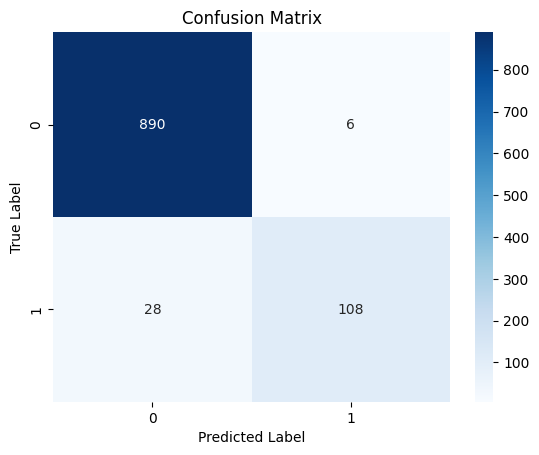

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.9786821705426356
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.86      0.91       136

    accuracy                           0.98      1032
   macro avg       0.98      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032



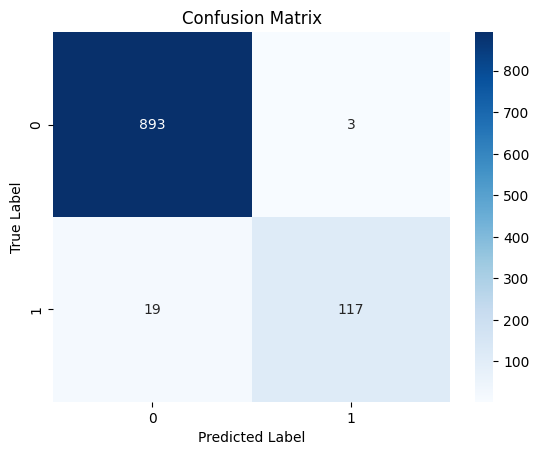

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##SVM(Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

Accuracy: 0.9815891472868217
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.88      0.93       136

    accuracy                           0.98      1032
   macro avg       0.98      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



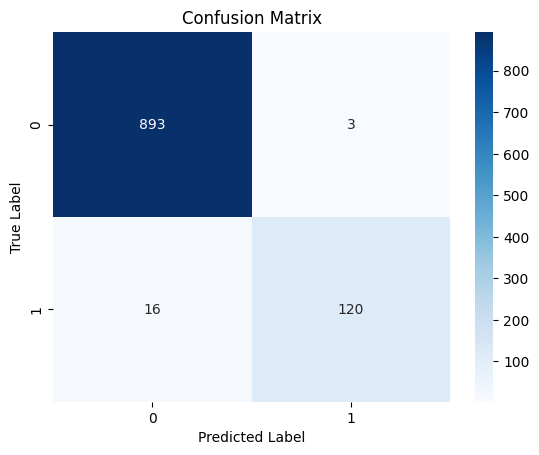

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Naive Bayes


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)





MultinomialNB()

Accuracy: 0.9748062015503876
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.84      0.90       136

    accuracy                           0.97      1032
   macro avg       0.97      0.92      0.94      1032
weighted avg       0.97      0.97      0.97      1032



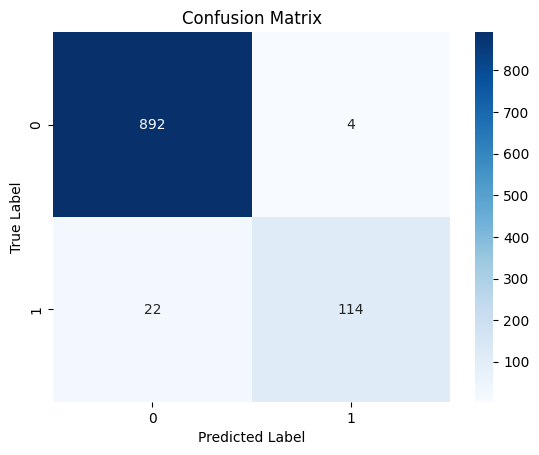

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##k-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

Accuracy: 0.9215116279069767
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       896
           1       0.98      0.41      0.58       136

    accuracy                           0.92      1032
   macro avg       0.95      0.71      0.77      1032
weighted avg       0.93      0.92      0.91      1032



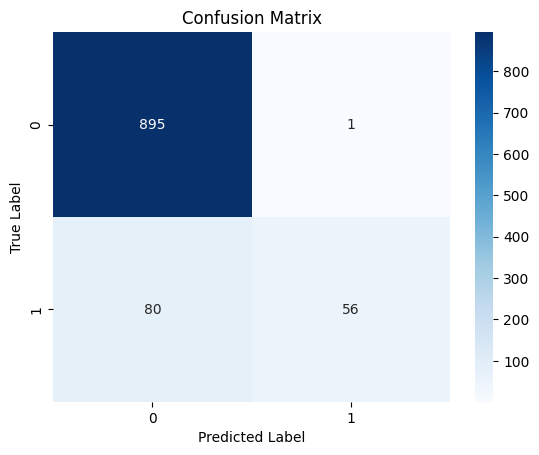

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.9670542635658915
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.95      0.79      0.86       136

    accuracy                           0.97      1032
   macro avg       0.96      0.89      0.92      1032
weighted avg       0.97      0.97      0.97      1032



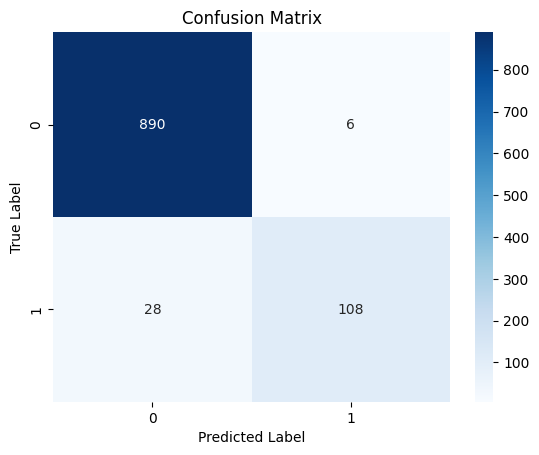

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###Accuracy Scores of the models
####1. Decision Tree: 0.9670542635658915
####2. Random Forest: 0.9786821705426356
####3. SVM(Support Vector Machine): 0.9815891472868217
####4. Naive Bayes: 0.9748062015503876
####5. K-Nearest Neighbours(K-NN): 0.9215116279069767
####6. Logistic Regression: 0.9670542635658915

###Among these models the best performing model is SVM(Support Vector Machine) with accuracy of 98.